In [77]:
import sqlite3, matplotlib.pyplot as plt, pandas as pd, base64, io
%matplotlib inline
connection = sqlite3.connect('database.db')

def display_image(image_data):
    decoded_image = io.BytesIO(base64.b64decode(image_data))
    img = plt.imread(decoded_image, format='png')
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Will techniques prevent overfitting?

In [78]:
df = pd.read_sql_query("""
    SELECT cf.*
    FROM configuration AS cf
    WHERE cf.id not IN (3,4,7,8) and normalization = 'None'
    ORDER BY cf.data_augmentation DESC;
""", connection)
df

,id,transfer_learning,freeze_layers,balance_classes,segmentation,data_augmentation,normalization,custom_optimizer,callback
0,1,True,True,True,True,True,None,True,False
1,9,True,True,True,False,True,None,False,False
2,11,True,True,True,False,True,None,True,False
3,5,False,False,True,False,False,None,False,False
4,6,False,False,False,True,False,None,False,False
5,12,True,True,True,False,False,None,False,False
6,13,True,True,True,False,False,None,True,False
7,14,True,True,True,True,False,None,True,False


ConfigurationIds to compare = 3 & 4 | 7 & 8 | 1 & 14 | 9 & 12 | 11 & 13

## Will data augmentation result in a balance between metrics even though reduce its values?

In [79]:
df = pd.read_sql_query("""
    SELECT cf.id AS conf_id, cf.data_augmentation, cf.transfer_learning, cf.balance_classes, cf.segmentation, AVG(nb.loss) AS average_loss, AVG(nb.accuracy) AS average_accuracy, AVG(nb.auc) AS average_auc, AVG(nb.recall) AS average_recall, AVG(nb.precision) AS average_precision
    FROM notebook AS nb JOIN configuration AS cf
    ON nb.configuration_id = cf.id
    GROUP BY cf.id
    ORDER BY cf.data_augmentation DESC, cf.transfer_learning DESC, cf.balance_classes DESC, cf.segmentation DESC;
""", connection)
df

,conf_id,data_augmentation,transfer_learning,balance_classes,segmentation,average_loss,average_accuracy,average_auc,average_recall,average_precision
0,1,True,True,True,True,4.434999,0.123478,0.875329,0.707497,0.719702
1,9,True,True,True,False,384.992309,0.917575,0.862257,0.761490,0.761490
2,10,True,True,True,False,1.180195,0.000000,0.886532,0.391232,0.692097
3,11,True,True,True,False,5.493853,0.093804,0.847888,0.647479,0.661518
4,8,True,True,False,False,394.568133,0.910722,0.862120,0.762383,0.762383
5,3,True,False,False,False,1.025738,0.003665,0.946757,0.703034,0.755215
6,14,False,True,True,True,6.307056,0.215975,0.856686,0.654172,0.684921
7,2,False,True,True,False,28.467390,0.744502,0.847069,0.723338,0.723338
8,12,False,True,True,False,756.753404,0.828361,0.797249,0.641678,0.641835
9,13,False,True,True,False,8.940302,0.193154,0.823434,0.603748,0.637793


In [80]:
df = pd.read_sql_query("""
    SELECT cf.id AS conf_id, cf.data_augmentation, cf.transfer_learning, cf.balance_classes, cf.segmentation, AVG(met.precision) AS average_precision, AVG(met.f1_score) AS average_f1_score, AVG(met.roc_auc) AS average_ROC_AUC, AVG(met.recall) AS average_recall, AVG(met.specificity) AS average_specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    JOIN configuration AS cf
    ON nb.configuration_id = cf.id
    GROUP BY cf.id
    ORDER BY cf.data_augmentation DESC, cf.transfer_learning DESC, cf.balance_classes DESC, cf.segmentation DESC;
""", connection)
df

,conf_id,data_augmentation,transfer_learning,balance_classes,segmentation,average_precision,average_f1_score,average_ROC_AUC,average_recall,average_specificity
0,1,True,True,True,True,0.505975,0.444543,0.896705,0.486738,0.930380
1,9,True,True,True,False,0.551536,0.429659,0.709976,0.423450,0.926735
2,10,True,True,True,False,0.330919,0.331020,0.789939,0.363790,0.912940
3,11,True,True,True,False,0.446332,0.406135,0.892822,0.469064,0.929117
4,8,True,True,False,False,0.512209,0.451127,0.720321,0.452022,0.930471
5,3,True,False,False,False,0.459005,0.445297,0.900915,0.465385,0.928422
6,14,False,True,True,True,0.379186,0.390607,0.866443,0.464568,0.935232
7,2,False,True,True,False,0.481668,0.429987,0.797469,0.434394,0.926536
8,12,False,True,True,False,0.370318,0.383413,0.747312,0.475064,0.933787
9,13,False,True,True,False,0.375381,0.370552,0.859959,0.457418,0.932084


## A model with more layers will have better results compared to others?

### Better results considering metrics from each model training
In terms of metrics, the query below shows how many classes of each model (configurationId) have all metrics value higher than 50%

In [81]:
df = pd.read_sql_query("""
    SELECT nb.architecture || ' (' || nb.configuration_id ||')' as name, count(*) as total
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.precision > .5 and met.f1_score > .5 and met.roc_auc > .5 and met.specificity > .5 and met.recall > .5 and nb.accuracy > .5
    group by nb.name
    ORDER BY count(*) DESC;
""", connection)
df

,name,total
0,ConvNeXt (8),7
1,ConvNeXt (7),4
2,ConvNeXt (9),4
3,ConvNeXt (12),2
4,ConvNeXt (2),2
5,Xception (12),1
6,Xception (7),1
7,Xception (9),1
8,Xception (8),1
9,Xception (2),1


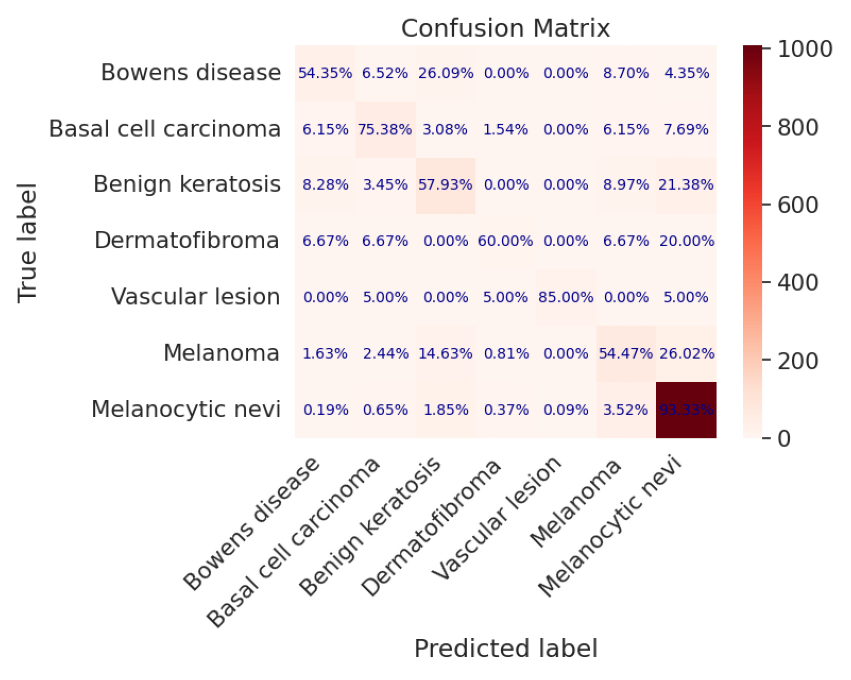

0    None
Name: confusion_matrix, dtype: object

In [82]:
df = pd.read_sql_query("""
    SELECT nb.confusion_matrix
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.precision > .5 and met.f1_score > .5 and met.roc_auc > .5 and met.specificity > .5 and met.recall > .5 and nb.accuracy > .5
    group by nb.name
    ORDER BY count(*) DESC
    LIMIT 1;
""", connection)
df['confusion_matrix'].apply(display_image)

Indeed ConvNeXt has more classes with all metrics above 50%

### Mean metric values from notebooks
Average metrics from each architecture

In [83]:
df = pd.read_sql_query("""
    SELECT nb.architecture, AVG(nb.loss) AS average_loss, AVG(nb.accuracy) AS average_accuracy, AVG(nb.auc) AS average_auc, AVG(nb.recall) AS average_recall, AVG(nb.precision) AS average_precision
    FROM notebook AS nb
    GROUP BY nb.architecture;
""", connection)
df

,architecture,average_loss,average_accuracy,average_auc,average_recall,average_precision
0,ConvNeXt,5.223859,0.279758,0.918423,0.690906,0.777911
1,ResNetV2,271.312468,0.408676,0.846801,0.632530,0.697157
2,Xception,237.851805,0.398135,0.818764,0.589383,0.643607


ConvNeXt has the best results, except for average accuracy which Xception performed better, however considering the other metrics, Xception would be the third

### Mean metric values from classes

In [84]:
df = pd.read_sql_query("""
    SELECT met.type, AVG(met.precision) AS average_precision, AVG(met.f1_score) AS average_f1_score, AVG(met.roc_auc) AS average_ROC_AUC, AVG(met.recall) AS average_recall, AVG(met.specificity) AS average_specificity
    FROM metrics AS met
    GROUP BY met.type;
""", connection)
df

,type,average_precision,average_f1_score,average_ROC_AUC,average_recall,average_specificity
0,Basal_cell_carcinoma,0.365867,0.333683,0.842942,0.385741,0.956630
1,Benign_keratosis,0.387104,0.347600,0.791087,0.387384,0.920429
2,Bowens_disease,0.282644,0.242518,0.817128,0.269883,0.976132
3,Dermatofibroma,0.229438,0.188702,0.796579,0.250407,0.982157
4,Melanocytic_nevi,0.892579,0.829991,0.841540,0.799955,0.721044
5,Melanoma,0.354158,0.304223,0.779940,0.326591,0.935369
6,Vascular_lesion,0.395517,0.348344,0.826230,0.439024,0.966542


In [85]:
df = pd.read_sql_query("""
    SELECT nb.architecture, met.type, AVG(met.precision) AS average_precision, AVG(met.f1_score) AS average_f1_score, AVG(met.roc_auc) AS average_ROC_AUC, AVG(met.recall) AS average_recall, AVG(met.specificity) AS average_specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    GROUP BY met.type,nb.architecture;
""", connection)
df

,architecture,type,average_precision,average_f1_score,average_ROC_AUC,average_recall,average_specificity
0,ConvNeXt,Basal_cell_carcinoma,0.516999,0.506272,0.915625,0.539560,0.971309
1,ResNetV2,Basal_cell_carcinoma,0.267418,0.269916,0.822097,0.387912,0.925122
2,Xception,Basal_cell_carcinoma,0.309131,0.216491,0.787116,0.217752,0.974754
3,ConvNeXt,Benign_keratosis,0.456115,0.427612,0.843446,0.430049,0.948692
4,ResNetV2,Benign_keratosis,0.392104,0.324114,0.760801,0.361576,0.916128
5,Xception,Benign_keratosis,0.307400,0.286725,0.767317,0.369231,0.894623
6,ConvNeXt,Bowens_disease,0.414216,0.350459,0.892294,0.375776,0.975286
7,ResNetV2,Bowens_disease,0.227326,0.180265,0.766842,0.173913,0.984955
8,Xception,Bowens_disease,0.200525,0.193316,0.790335,0.259197,0.967542
9,ConvNeXt,Dermatofibroma,0.454209,0.332788,0.868914,0.314286,0.995026


In [86]:
df = pd.read_sql_query("""
    SELECT nb.architecture, AVG(met.precision) AS average_precision, AVG(met.f1_score) AS average_f1_score, AVG(met.roc_auc) AS average_ROC_AUC, AVG(met.recall) AS average_recall, AVG(met.specificity) AS average_specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    GROUP BY nb.architecture;
""", connection)
df

,architecture,average_precision,average_f1_score,average_ROC_AUC,average_recall,average_specificity
0,ConvNeXt,0.545185,0.494717,0.880260,0.504421,0.932611
1,ResNetV2,0.361326,0.313254,0.780909,0.355494,0.920205
2,Xception,0.333644,0.299081,0.777130,0.362053,0.914444


After analysis, the inference is the ConvNeXt architecture have best overall metrics values

## What would be the impact of each technique?

In [87]:
df = pd.read_sql_query("""
    SELECT cf.id AS conf_id, cf.data_augmentation, cf.transfer_learning, cf.segmentation, cf.balance_classes, AVG(nb.loss) AS average_loss, AVG(nb.accuracy) AS average_accuracy, AVG(nb.auc) AS average_auc, AVG(nb.recall) AS average_recall, AVG(nb.precision) AS average_precision
    FROM notebook AS nb JOIN configuration AS cf ON cf.id = nb.configuration_id
    GROUP BY cf.id;
""", connection)
df

,conf_id,data_augmentation,transfer_learning,segmentation,balance_classes,average_loss,average_accuracy,average_auc,average_recall,average_precision
0,1,True,True,True,True,4.434999,0.123478,0.875329,0.707497,0.719702
1,2,False,True,False,True,28.467390,0.744502,0.847069,0.723338,0.723338
2,3,True,False,False,False,1.025738,0.003665,0.946757,0.703034,0.755215
3,4,False,False,False,False,0.836105,0.000414,0.944088,0.626506,0.834031
4,5,False,False,False,True,4.032384,0.061452,0.806936,0.347613,0.602892
5,6,False,False,True,False,0.748712,0.002040,0.953680,0.688309,0.823954
6,7,False,True,False,False,723.806834,0.842800,0.771175,0.601963,0.602144
7,8,True,True,False,False,394.568133,0.910722,0.862120,0.762383,0.762383
8,9,True,True,False,True,384.992309,0.917575,0.862257,0.761490,0.761490
9,10,True,True,False,True,1.180195,0.000000,0.886532,0.391232,0.692097


Metric | Best | Worst
:---: | :---: | :---:
Loss | 6 | 7
Accuracy | 9 | 4
AUC | 6 | 7
Recall | 8 | 5
Precision | 4 | 7

Apparent best configurationId = 6

Apparent worst configurationId = 7

### Closing database connection

In [88]:
connection.close()